## Problem
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.
They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:

 ● Which variables are significant in predicting the price of a car.

 ● How well those variables describe the price of a car.
 
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.

## Attributes

1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky, that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car

## Objective
You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mt
from scipy import stats
mt.rcParams['figure.figsize']=[15,10]
import warnings
warnings.filterwarnings('ignore')

## Understanding the dataset.

In [26]:
pd.set_option('display.max_columns',30)

In [3]:
ogdf=pd.read_csv('CarPrice_Assignment.csv')

In [5]:
df=ogdf.copy(deep=True)

In [27]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.shape

(205, 26)

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [28]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data cleansing

In [41]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [39]:
df=df.drop_duplicates()

In [40]:
df.shape

(205, 26)

## Exploratory Data Analysis

### Univariate

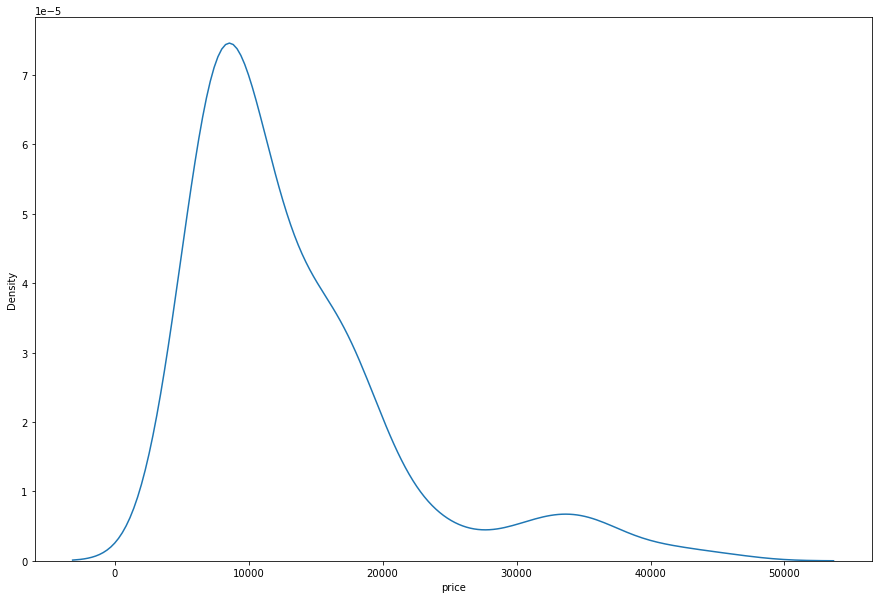

In [44]:
sb.kdeplot(df['price'])
mt.show()

The target is positive or right skewed.

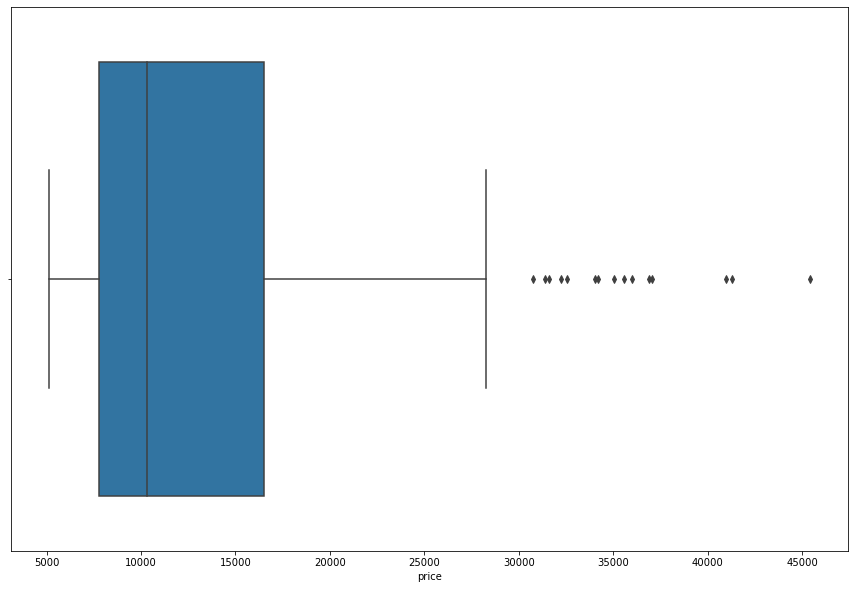

In [45]:
sb.boxplot(df['price'])
mt.show()

There are outliers present in the target 'price'.

## Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss=StandardScaler()

In [52]:
df['price']=ss.fit_transform(df[['price']])

In [54]:
df['price'].mean()

1.5813908448319302e-16

In [55]:
df['price'].std()

1.0024479840791312

## Correlation

In [60]:
ncols=df.select_dtypes('number').drop(columns=['car_ID','symboling'])

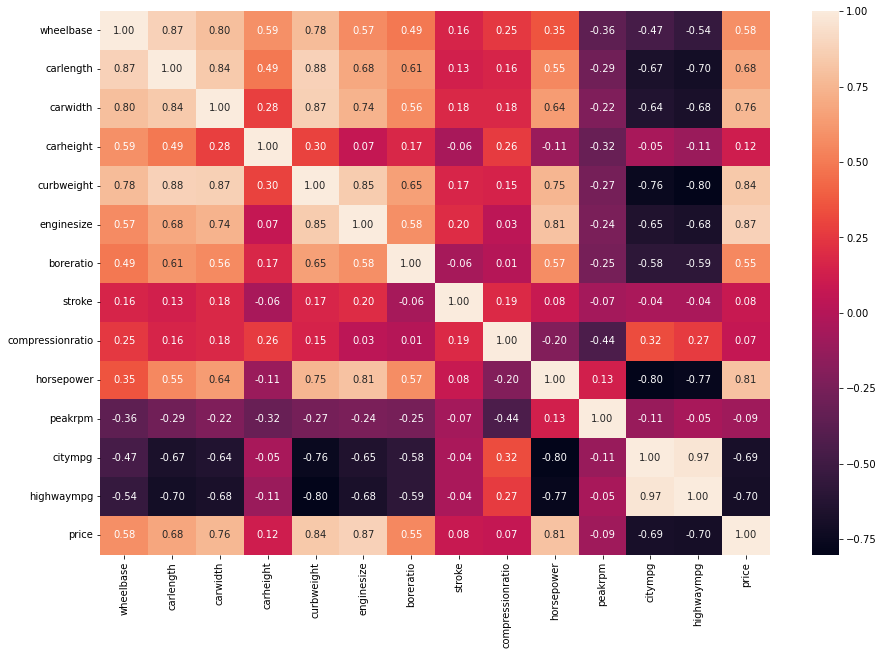

In [62]:
sb.heatmap(ncols.corr(),annot=True,fmt='.2f')
mt.show()

The variables:

   * Horsepower
   * Engine size
   * Curb weight
   * Car width
   * Car length
  are highly correlated with price

In [69]:
ncols1=ncols.drop(columns='price')

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif=[]
for i in range(ncols1.shape[1]):
    vif.append(variance_inflation_factor(ncols1,i))

In [77]:
pd.DataFrame({'Variable':ncols1.columns,'VIF':vif})

,Variable,VIF
0,wheelbase,1903.661515
1,carlength,1893.737555
2,carwidth,2350.896000
3,carheight,917.204632
4,curbweight,403.021184
5,enginesize,68.765509
6,boreratio,290.276837
7,stroke,125.834481
8,compressionratio,15.752468
9,horsepower,65.532593


There is multi collinearity present in every numeric variable.

## Univariate

In [81]:
ncols1.shape[1]

13

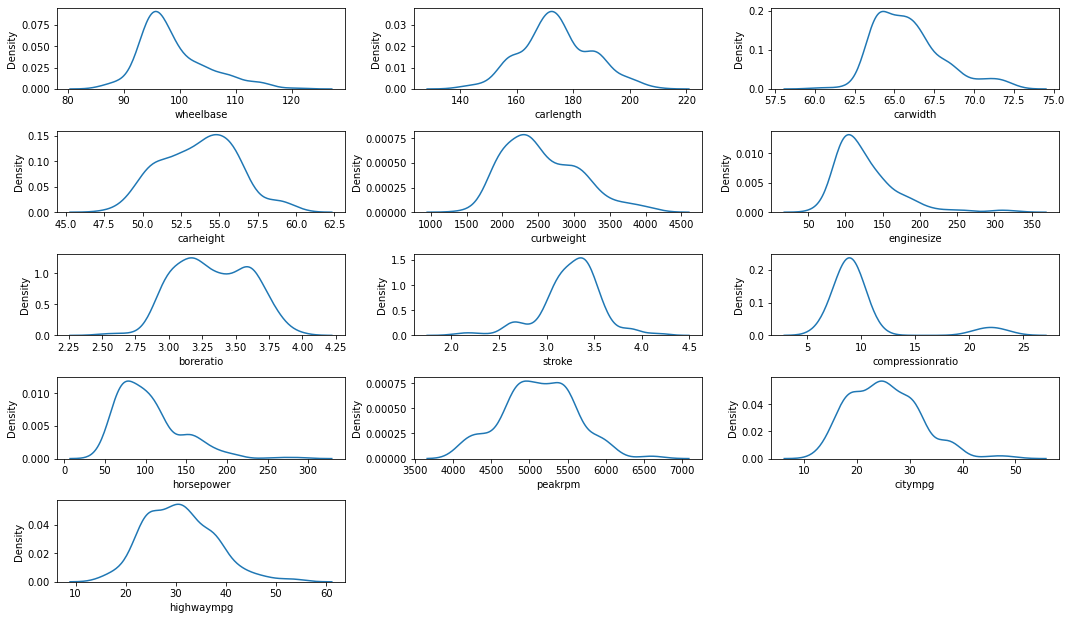

In [83]:
r=6
c=3
itr=1
for i in ncols1.columns:
    mt.subplot(r,c,itr)
    sb.kdeplot(data=df,x=i)
    itr+=1
mt.tight_layout()
mt.show()

In [85]:
ncols1.skew()[(ncols1.skew()>0.5)|(ncols1.skew()<-0.5)]

wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
enginesize          1.947655
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
citympg             0.663704
highwaympg          0.539997
dtype: float64

The above variables are highly skewed both positively and negatively.

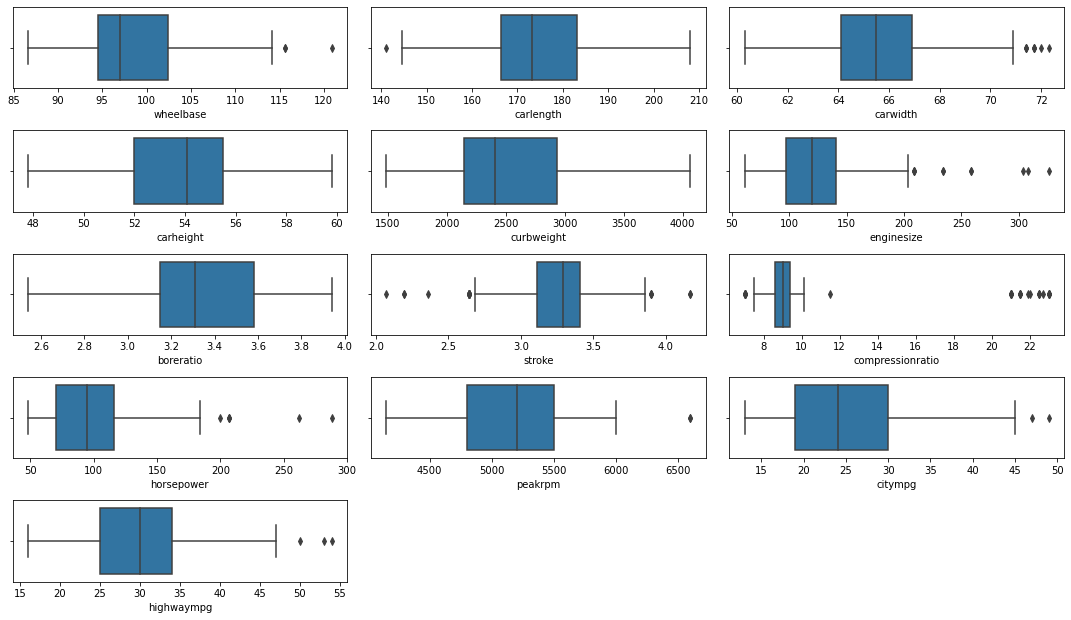

In [86]:
r=6
c=3
itr=1
for i in ncols1.columns:
    mt.subplot(r,c,itr)
    sb.boxplot(data=df,x=i)
    itr+=1
mt.tight_layout()
mt.show()

Outliers are present in most of the numeric variables.

In [91]:
ccols=df.select_dtypes('object').drop(columns='CarName')

In [92]:
ccols.shape[1]

9

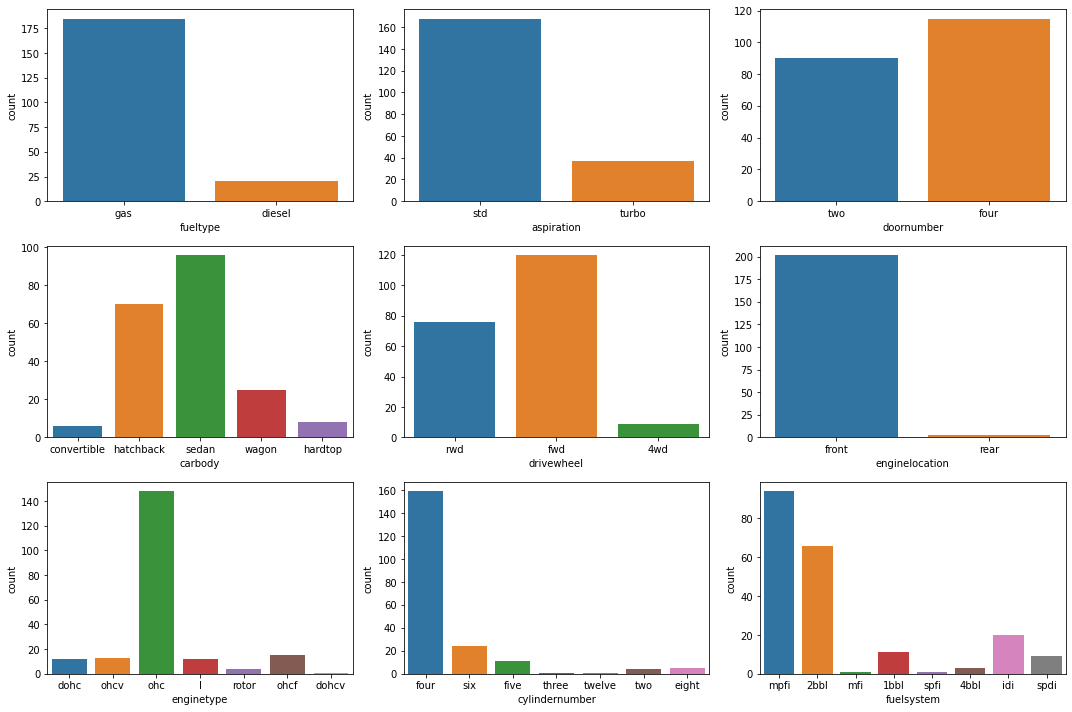

In [93]:
n=3
r=3
itr=1
for i in ccols.columns:
    mt.subplot(r,c,itr)
    sb.countplot(data=df,x=i)
    itr+=1
mt.tight_layout()
mt.show()    

* Gas type vehicles are present at the highest.
* Four doors are highly sold.
* Sedan type body is preferred the most.
* Forward drive wheel is the highest.
* Front engines are highly used.
* OHC engines are the highest.
* The highest number of cylinders are 4.
* MPFI fuel system is the used the most.

## Bivariate Analysis

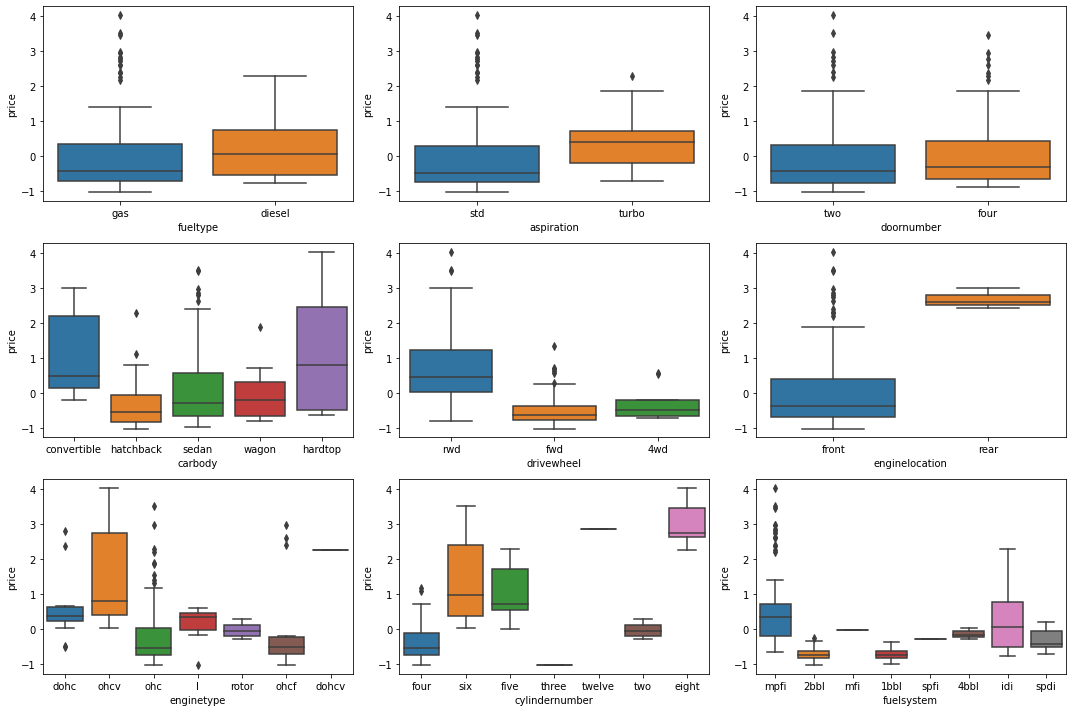

In [95]:
n=3
r=3
itr=1
for i in ccols.columns:
    mt.subplot(r,c,itr)
    sb.boxplot(data=df,x=i,y='price')
    itr+=1
mt.tight_layout()
mt.show()    

* Price of diesel engine with turbo aspiration and four doors have the highest price.
* The hardtop body with rear wheel drive and rear engine have the highest price.
* OHVC engine type is the highest having eight cylinders and fuel system IDI.

## Feature Engineering

For predicting price, we remove ID and car name variables as it is redundant for the model to predict.

In [98]:
df1=df.drop(columns=['car_ID','CarName'])

In [107]:
df1.select_dtypes('object').columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [104]:
df1['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [118]:
d1={'gas':0,'diesel':1}

In [135]:
df1['fueltype']=df1['fueltype'].map(d1)

In [117]:
df1['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [119]:
d2={'four':1,'two':0}

In [136]:
df1['doornumber']=df1['doornumber'].map(d2)

In [109]:
df1['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [121]:
df1.groupby(['carbody'])['price'].median()

carbody
convertible    0.477805
hardtop        0.804431
hatchback     -0.549570
sedan         -0.304945
wagon         -0.198600
Name: price, dtype: float64

In [123]:
d3={'convertible':0.477805,'hardtop':0.804431,'hatchback':-0.549570,'sedan':-0.304945,'wagon':-0.198600}

In [137]:
df1['carbody']=df1['carbody'].map(d3)

In [110]:
df1['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [124]:
d4={'fwd':1,'rwd':2,'4wd':0}

In [138]:
df1['drivewheel']=df1['drivewheel'].map(d4)

In [111]:
df1['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [125]:
d5={'front':1,'rear':0}

In [139]:
df1['enginelocation']=df1['enginelocation'].map(d5)

In [112]:
df1['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [141]:
d6=df1.groupby(['enginetype'])['price'].median().to_dict()

In [142]:
df1['enginetype']=df1['enginetype'].map(d6)

In [113]:
df1['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [132]:
d7=df1.groupby(['cylindernumber'])['price'].median().to_dict()

In [143]:
df1['cylindernumber']=df1['cylindernumber'].map(d7)

In [114]:
df1['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [133]:
d8=df1.groupby(['fuelsystem'])['price'].median().to_dict()

In [144]:
df1['fuelsystem']=df1['fuelsystem'].map(d8)

In [146]:
df1['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [147]:
d9={'std':1,'turbo':0}

In [148]:
df1['aspiration']=df1['aspiration'].map(d9)

In [149]:
df1.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,0,0.477805,2,1,88.6,168.8,64.1,48.8,2548,0.372965,-0.543170,130,0.340654,3.47,2.68,9.0,111,5000,21,27,0.027391
1,3,0,1,0,0.477805,2,1,88.6,168.8,64.1,48.8,2548,0.372965,-0.543170,130,0.340654,3.47,2.68,9.0,111,5000,21,27,0.404461
2,1,0,1,0,-0.549570,2,1,94.5,171.2,65.5,52.4,2823,0.805874,0.973830,152,0.340654,2.68,3.47,9.0,154,5000,19,26,0.404461
3,2,0,1,1,-0.304945,1,1,99.8,176.6,66.2,54.3,2337,-0.533885,-0.543170,109,0.340654,3.19,3.40,10.0,102,5500,24,30,0.084485
4,2,0,1,1,-0.304945,0,1,99.4,176.6,66.4,54.3,2824,-0.533885,0.708125,136,0.340654,3.19,3.40,8.0,115,5500,18,22,0.523668


## Train Test Split

In [150]:
x=df1.drop(columns='price')
y=df1['price']

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
xtr,xte,ytr,yte=train_test_split(x,y,train_size=0.8,random_state=17)

In [153]:
print(xtr.shape,xte.shape)

(164, 23) (41, 23)


In [154]:
print(ytr.shape,yte.shape)

(164,) (41,)


## Model Building

### Linear Regression

In [155]:
import statsmodels.api as sma

In [156]:
lr=sma.OLS(ytr,sma.add_constant(xtr)).fit()

In [157]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     62.60
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           3.66e-62
Time:                        21:15:22   Log-Likelihood:                -26.832
No. Observations:                 164   AIC:                             101.7
Df Residuals:                     140   BIC:                             176.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.8522      1.766     -4.447      0.000     -11.343      -4.361
symboling            0.0774      0.033      2.360      0.020       0.013       0.142
fueltype             1.0709      0.793      1.350      0.179      -0.497       2.639
aspiration          -0.1752      0.121     -1.442      0.152      -0.415       0.065
doornumber           0.0950      0.083      1.150      0.252      -0.068       0.258
carbody              0.1558      0.103      1.516      0.132      -0.047       0.359
drivewheel           0.2595      0.073      3.568      0.000       0.116       0.403
enginelocation      -1.0156      0.298     -3.403      0.001      -1.606      -0.426
wheelbase            0.0179      0.014      1.288      0.200      -0.010       0.045
carlength           -0.0112      0.007     -1.676      0.096      -0.024       0.002
carwidth             0.0747      0.030      2.459      0.015       0.015       0.135
carheight            0.0227      0.016      1.408      0.161      -0.009       0.055
curbweight           0.0005      0.000      2.130      0.035    3.92e-05       0.001
enginetype          -0.4071      0.084     -4.866      0.000      -0.573      -0.242
cylindernumber       0.4535      0.089      5.106      0.000       0.278       0.629
enginesize           0.0056      0.002      2.459      0.015       0.001       0.010
fuelsystem           0.0157      0.078      0.202      0.840      -0.138       0.169
boreratio            0.0383      0.162      0.236      0.814      -0.283       0.359
stroke              -0.3350      0.099     -3.379      0.001      -0.531      -0.139
compressionratio    -0.0733      0.056     -1.317      0.190      -0.183       0.037
horsepower           0.0029      0.003      1.161      0.248      -0.002       0.008
peakrpm              0.0002    8.3e-05      2.741      0.007    6.34e-05       0.000
citympg             -0.0163      0.021     -0.782      0.436      -0.058       0.025
highwaympg           0.0323      0.019      1.698      0.092      -0.005       0.070
==============================================================================
Omnibus:                        7.938   Durbin-Watson:                   2.374
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.574
Skew:                           0.393   Prob(JB):                       0.0137
Kurtosis:                       3.799   Cond. No.                     4.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Though Multi Collinearity is present in every column we cannot remove them.

In [159]:
lr.pvalues[lr.pvalues<0.05]

const             0.000018
symboling         0.019643
drivewheel        0.000494
enginelocation    0.000869
carwidth          0.015138
curbweight        0.034950
enginetype        0.000003
cylindernumber    0.000001
enginesize        0.015155
stroke            0.000942
peakrpm           0.006927
dtype: float64

The above variables are signficant over price.

Let us see if the R square increases on remove some of the insignificant variables.

In [169]:
stats.jarque_bera(lr.resid)

Jarque_beraResult(statistic=8.57391861177295, pvalue=0.01374666120394874)

As the p values is less than 0.05 the data is normalized.

In [162]:
lr.pvalues[lr.pvalues>0.05].index

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'wheelbase',
       'carlength', 'carheight', 'fuelsystem', 'boreratio', 'compressionratio',
       'horsepower', 'citympg', 'highwaympg'],
      dtype='object')

In [171]:
lr1=sma.OLS(ytr,sma.add_constant(xtr1)).fit()

In [172]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     81.62
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.19e-64
Time:                        21:23:48   Log-Likelihood:                -37.698
No. Observations:                 164   AIC:                             109.4
Df Residuals:                     147   BIC:                             162.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.2497      1.622     -4.470      0.000     -10.454      -4.045
symboling            0.0351      0.024      1.436      0.153      -0.013       0.083
drivewheel           0.1958      0.062      3.152      0.002       0.073       0.319
enginelocation      -1.2835      0.289     -4.447      0.000      -1.854      -0.713
carwidth             0.0701      0.027      2.589      0.011       0.017       0.124
curbweight           0.0008      0.000      3.689      0.000       0.000       0.001
enginetype          -0.4270      0.085     -5.053      0.000      -0.594      -0.260
cylindernumber       0.4032      0.086      4.710      0.000       0.234       0.572
enginesize           0.0034      0.002      1.580      0.116      -0.001       0.008
fuelsystem           0.0071      0.077      0.091      0.927      -0.146       0.160
boreratio            0.0257      0.163      0.157      0.875      -0.297       0.348
stroke              -0.2390      0.096     -2.495      0.014      -0.428      -0.050
compressionratio     0.0048      0.011      0.449      0.654      -0.016       0.026
horsepower           0.0031      0.002      1.621      0.107      -0.001       0.007
peakrpm              0.0002   8.04e-05      2.019      0.045    3.41e-06       0.000
citympg              0.0048      0.019      0.249      0.803      -0.033       0.043
highwaympg           0.0121      0.018      0.683      0.496      -0.023       0.047
==============================================================================
Omnibus:                       22.210   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.144
Skew:                           0.620   Prob(JB):                     2.60e-10
Kurtosis:                       5.218   Cond. No.                     3.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

On removing some of the variables there is a decrease in R square value and minute decrease of Adj. R square. Hence we cannot remove those variables.

In [160]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, ad

In [176]:
lrr=lr.rsquared

In [194]:
lrm=np.sqrt(lr.mse_resid)
lrm

0.3084428329860027

## Regularization Model

## Ridge

In [178]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [180]:
ridge=Ridge()

In [182]:
ri1=ridge.fit(xtr,ytr)

In [186]:
rypred=ri1.predict(xte)

In [196]:
rrm=np.sqrt(mean_squared_error(rypred,yte))

In [211]:
rrm

0.3973824637456064

In [198]:
rr=r2_score(rypred,yte)

In [210]:
rr

0.8374377437203877

For better model performance we perform Grid Search for hyperparametric tuning.

In [199]:
ridge=Ridge()

In [200]:
params={'alpha':[0.05,0.1,0.2,0.5,0.8]}

In [201]:
grid=GridSearchCV(estimator=ridge, param_grid=params)

In [202]:
grid.fit(xtr,ytr)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 0.8]})

In [203]:
grid.best_params_

{'alpha': 0.8}

In [204]:
ridge=Ridge(alpha=0.8)

In [205]:
ri2=ridge.fit(xtr,ytr)

In [206]:
rypred1=ri1.predict(xte)

In [207]:
rrm1=np.sqrt(mean_squared_error(rypred,yte))

In [212]:
rrm1

0.3973824637456064

In [226]:
rr1=np.sqrt(r2_score(rypred,yte))

In [227]:
rr1

0.9151162460148916

## Lasso

In [213]:
lasso=Lasso()

In [214]:
params={'alpha':[0.05,0.1,0.2,0.5,0.8]}

In [215]:
grid=GridSearchCV(estimator=lasso, param_grid=params)

In [216]:
grid.fit(xtr,ytr)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 0.8]})

In [217]:
grid.best_params_

{'alpha': 0.05}

In [231]:
lasso=Lasso(alpha=0.05)

In [232]:
ls=lasso.fit(xtr,ytr)

In [233]:
lypred=ls.predict(xte)

In [234]:
lrm1=np.sqrt(mean_squared_error(lypred,yte))

In [235]:
lrm1

0.46292587774608984

In [237]:
larr=r2_score(lypred,yte)

In [238]:
larr

0.7491285959283985

## Elastic Net

In [239]:
from sklearn.linear_model import ElasticNet

In [240]:
enet=ElasticNet()

In [241]:
params={'alpha':[0.01,0.02,0.5,0.7],'l1_ratio':[0.2,0.4,0.5]}

In [242]:
grid=GridSearchCV(estimator=enet,param_grid=params)

In [243]:
grid.fit(xtr,ytr)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.02, 0.5, 0.7],
                         'l1_ratio': [0.2, 0.4, 0.5]})

In [244]:
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.2}

In [245]:
enet=ElasticNet(alpha=0.01,l1_ratio=0.2)

In [246]:
enet.fit(xtr,ytr)

ElasticNet(alpha=0.01, l1_ratio=0.2)

In [248]:
eypred=enet.predict(xte)

In [251]:
erm=np.sqrt(mean_squared_error(eypred,yte))
erm

0.39385908173271733

In [253]:
err=r2_score(eypred,yte)

In [268]:
result=pd.DataFrame()

In [263]:
[['Linear','Ridge','Lasso','Elastic Net']]

[['Linear', 'Ridge', 'Lasso', 'Elastic Net']]

In [264]:
[lrm,rrm1,lrm1,erm]

[0.3084428329860027,
 0.3973824637456064,
 0.46292587774608984,
 0.39385908173271733]

In [266]:
[lrr,rr1,larr,err]

[0.9113825445166048,
 0.9151162460148916,
 0.7491285959283985,
 0.8350821906539376]

In [272]:
result['Model']=np.array(['Linear','Ridge','Lasso','ElasticNet'])
result['RMSE']=np.array([lrm,rrm1,lrm1,erm])
result['R-Square']=np.array([lrr,rr1,larr,err])

In [274]:
result.sort_values(by='RMSE',ascending=True)

,Model,RMSE,R-Square
0,Linear,0.308443,0.911383
3,ElasticNet,0.393859,0.835082
1,Ridge,0.397382,0.915116
2,Lasso,0.462926,0.749129


From the model metrics we can say that Linear Model or regression works good in predicting the price of the car.

In [278]:
pd.DataFrame(lr.pvalues[lr.pvalues<0.05].index,columns=['Features']).drop(index=0)

,Features
1,symboling
2,drivewheel
3,enginelocation
4,carwidth
5,curbweight
6,enginetype
7,cylindernumber
8,enginesize
9,stroke
10,peakrpm


The above features are significant over the target variable 'price' and they determine the R square score at the maximum.